# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Easily-creating-MAB-problems" data-toc-modified-id="Easily-creating-MAB-problems-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Easily creating MAB problems</a></div><div class="lev2 toc-item"><a href="#Bernoulli-arms" data-toc-modified-id="Bernoulli-arms-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Bernoulli arms</a></div><div class="lev2 toc-item"><a href="#Gaussian-arms" data-toc-modified-id="Gaussian-arms-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gaussian arms</a></div><div class="lev2 toc-item"><a href="#Exponential-arms" data-toc-modified-id="Exponential-arms-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exponential arms</a></div><div class="lev2 toc-item"><a href="#Uniform-arms" data-toc-modified-id="Uniform-arms-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Uniform arms</a></div><div class="lev2 toc-item"><a href="#Arms-with-rewards-outside-of-$[0,-1]$" data-toc-modified-id="Arms-with-rewards-outside-of-$[0,-1]$-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Arms with rewards outside of <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-8-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo stretchy=&quot;false&quot;>[</mo><mn>0</mn><mo>,</mo><mn>1</mn><mo stretchy=&quot;false&quot;>]</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-44" role="math" style="width: 2.666em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.109em; height: 0px; font-size: 126%;"><span style="position: absolute; clip: rect(1.933em, 1002.02em, 2.931em, -1000em); top: -2.692em; left: 0em;"><span class="mrow" id="MathJax-Span-45"><span class="mo" id="MathJax-Span-46" style="font-family: STIXMathJax_Main;">[</span><span class="mn" id="MathJax-Span-47" style="font-family: STIXMathJax_Main;">0</span><span class="mo" id="MathJax-Span-48" style="font-family: STIXMathJax_Main;">,</span><span class="mn" id="MathJax-Span-49" style="font-family: STIXMathJax_Main; padding-left: 0.188em;">1</span><span class="mo" id="MathJax-Span-50" style="font-family: STIXMathJax_Main;">]</span></span><span style="display: inline-block; width: 0px; height: 2.692em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.232em; border-left: 0px solid; width: 0px; height: 1.118em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo stretchy="false">[</mo><mn>0</mn><mo>,</mo><mn>1</mn><mo stretchy="false">]</mo></math></span></span><script type="math/tex" id="MathJax-Element-8">[0, 1]</script></a></div><div class="lev2 toc-item"><a href="#Gamma-arms" data-toc-modified-id="Gamma-arms-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Gamma arms</a></div><div class="lev2 toc-item"><a href="#Non-truncated-Gaussian-and-Gamma-arms" data-toc-modified-id="Non-truncated-Gaussian-and-Gamma-arms-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Non-truncated Gaussian and Gamma arms</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Conclusion</a></div>

---
# Easily creating MAB problems
First, be sure to be in the main folder, and import `MAB` from `Environment` package:

In [1]:
from sys import path
path.insert(0, '..')

In [3]:
from Environment import MAB

And also, import all the types of arms.

In [5]:
from Arms import *
# Check it exists:
Bernoulli, Gaussian, Exponential, ExponentialFromMean, Poisson, Uniform, Gamma, GammaFromMean

(Arms.Bernoulli.Bernoulli,
 Arms.Gaussian.Gaussian,
 Arms.Exponential.Exponential,
 Arms.Exponential.ExponentialFromMean,
 Arms.Poisson.Poisson,
 Arms.Uniform.Uniform,
 Arms.Gamma.Gamma,
 Arms.Gamma.GammaFromMean)

## Bernoulli arms
Then it's easy to create a Multi-Armed Bandit problem, instance of `MAB` class, either from a list of `Arm` objects:

In [6]:
M_B = MAB([Bernoulli(mu) for mu in [0.1, 0.5, 0.9]])

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [B(0.1), B(0.5), B(0.9)] ...
 - with 'arms' = [B(0.1), B(0.5), B(0.9)]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.24 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...


Or from a dictionary, with keys `"arm_type"` and `"params"`:

In [7]:
M_B = MAB({
    "arm_type": Bernoulli,
    "params": [0.1, 0.5, 0.9]
})

Creating a new MAB problem ...
  Reading arms of this MAB problem from a dictionnary 'configuration' = {'arm_type': <class 'Arms.Bernoulli.Bernoulli'>, 'params': [0.1, 0.5, 0.9]} ...
 - with 'arm_type' = <class 'Arms.Bernoulli.Bernoulli'>
 - with 'params' = [0.1, 0.5, 0.9]
 - with 'arms' = [B(0.1), B(0.5), B(0.9)]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.24 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...


The `plotHistogram()` method draws a lot of samples from each arm, and plot a histogram of their repartition:

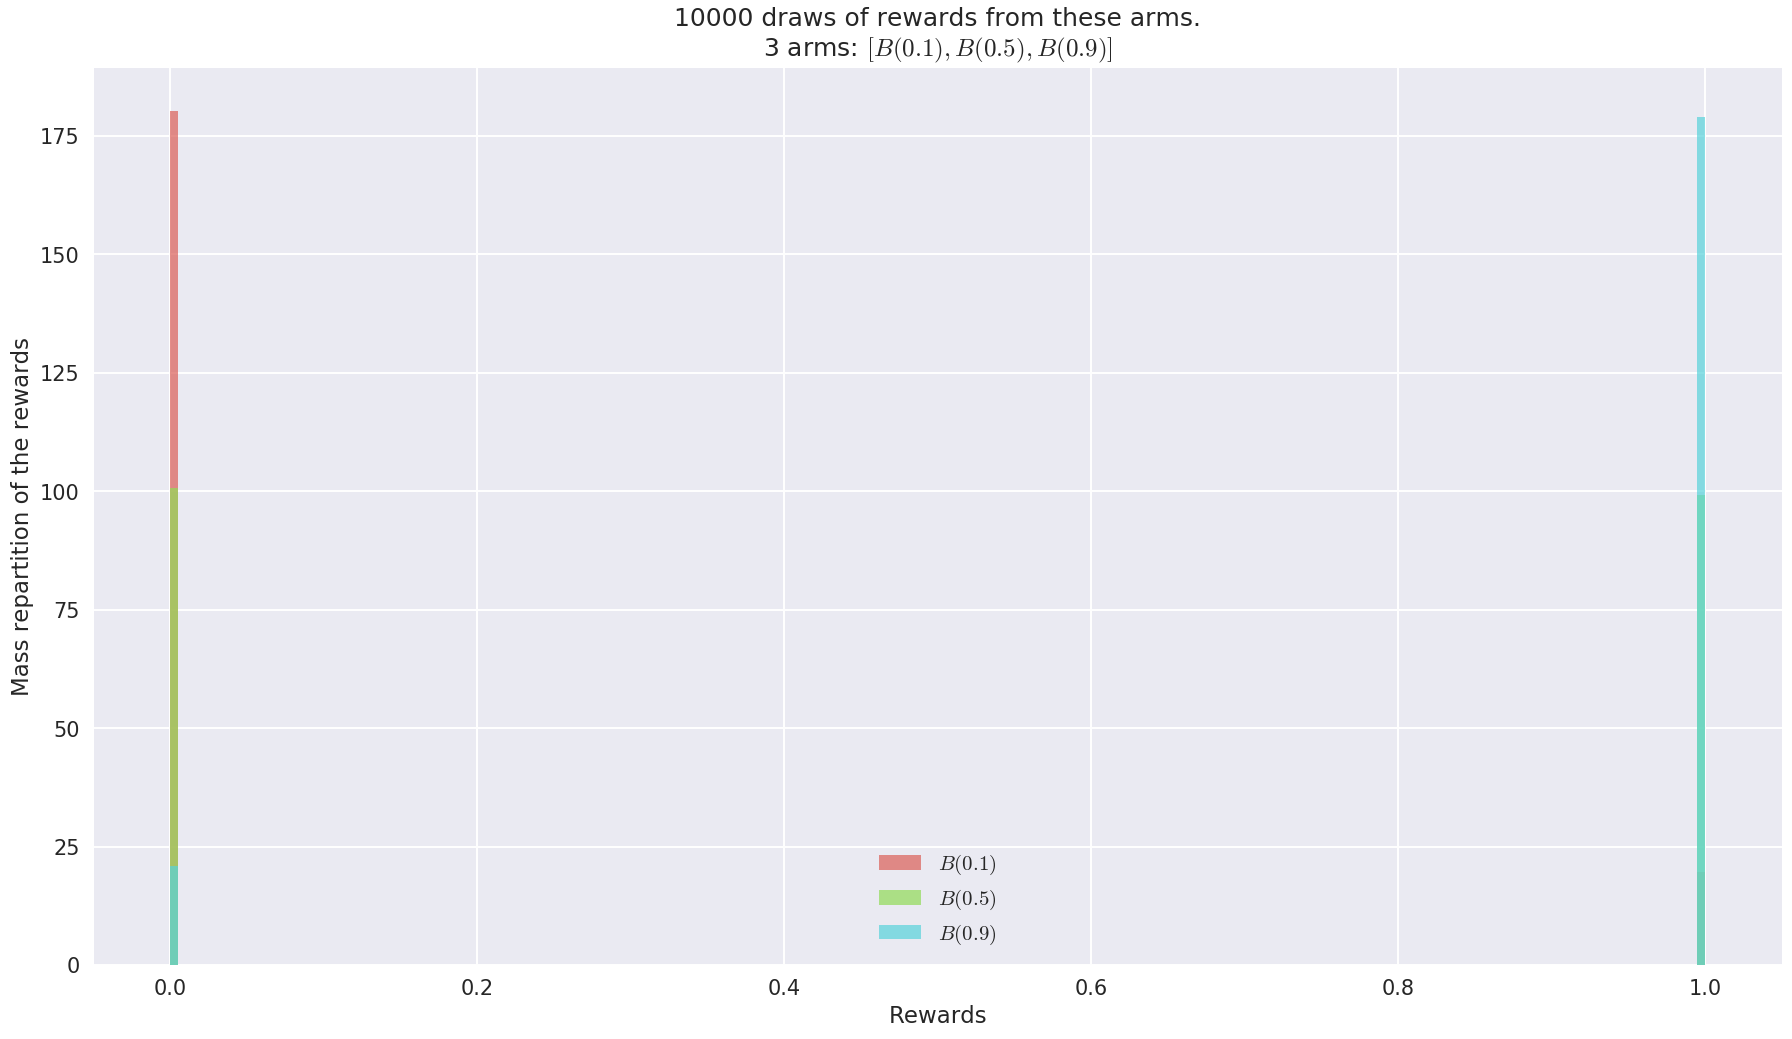

In [8]:
M_B.plotHistogram()

## Gaussian arms
And with Gaussian arms, with a small variance of $\sigma^2 = 0.05$, for rewards truncated into $[0, 1]$:

In [9]:
M_G = MAB([Gaussian(mu, sigma=0.05) for mu in [0.1, 0.5, 0.9]])

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [G(0.1, 0.05), G(0.5, 0.05), G(0.9, 0.05)] ...
 - with 'arms' = [G(0.1, 0.05), G(0.5, 0.05), G(0.9, 0.05)]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 0.375 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...


The histogram clearly shows that low-variance Gaussian arms are easy to separate:

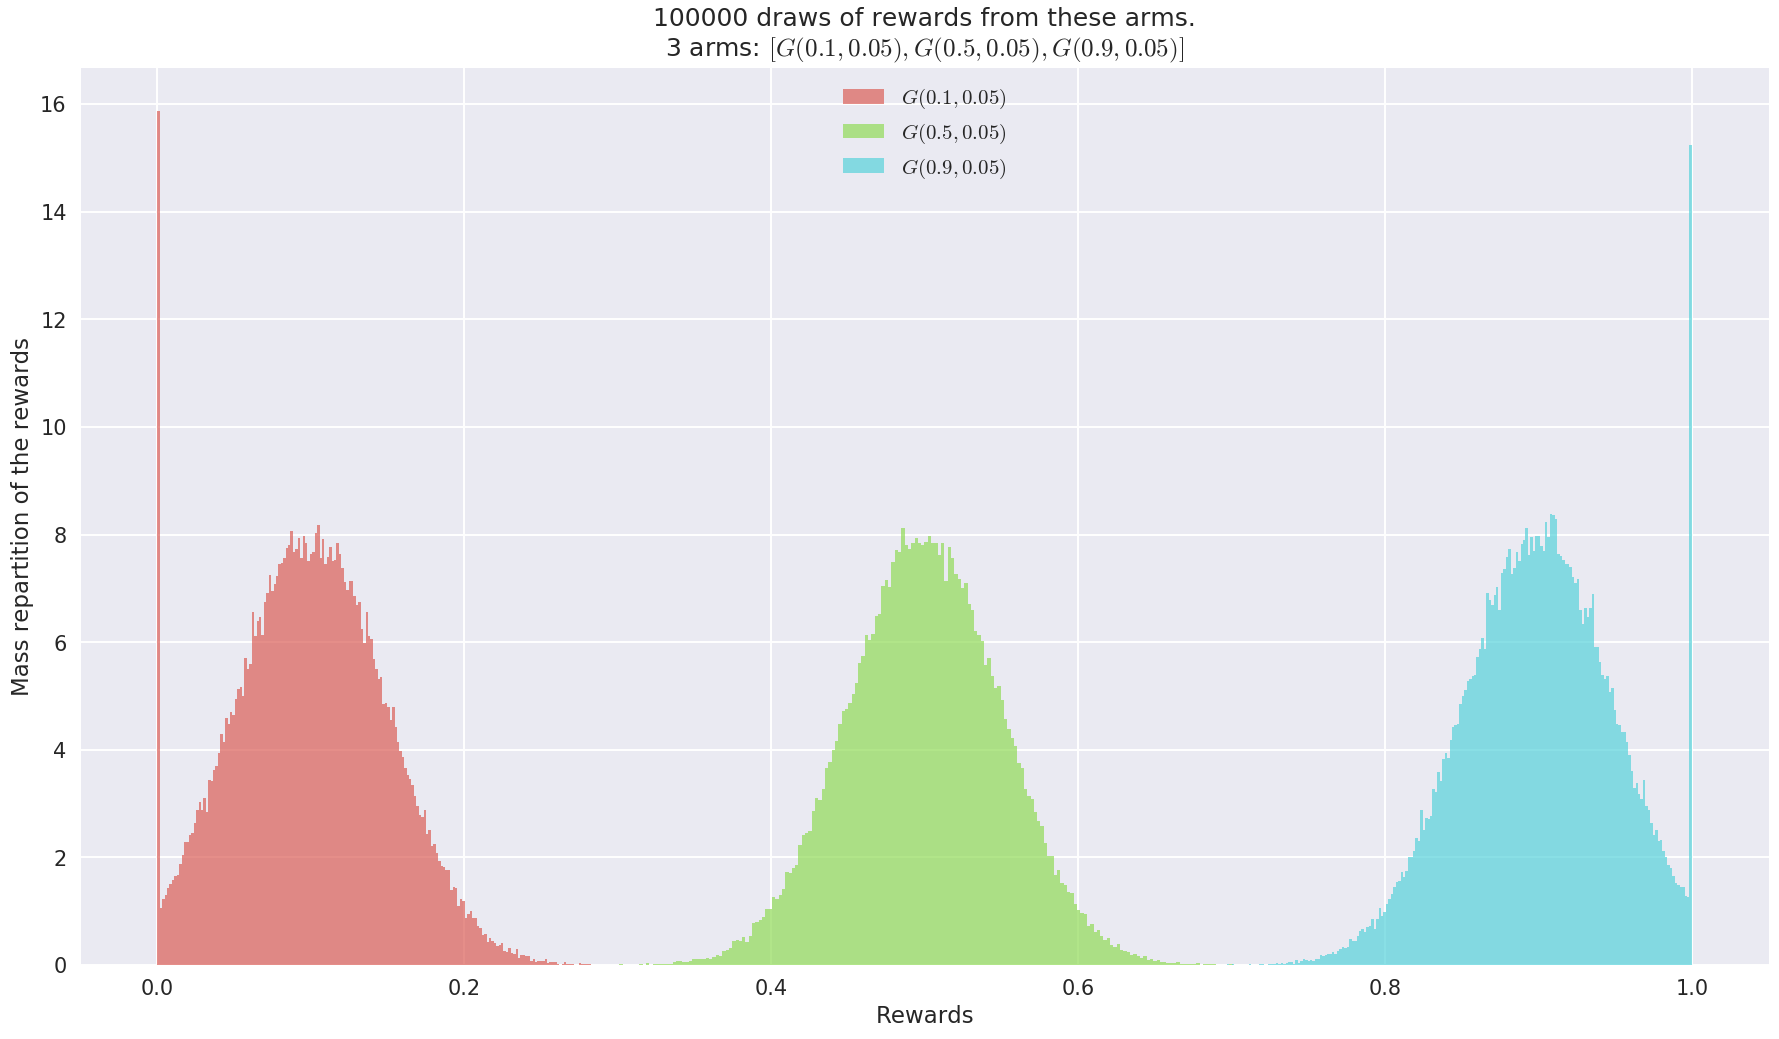

In [10]:
M_G.plotHistogram(100000)

But if the variance is larger, it can be very hard to differentiate between arms, and so MAB learning will be harder.
With a big variance of $\sigma^2 = 0.5$, for rewards truncated into $[0, 1]$:

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [G(0.1, 0.1), G(0.5, 0.1), G(0.9, 0.1)] ...
 - with 'arms' = [G(0.1, 0.1), G(0.5, 0.1), G(0.9, 0.1)]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 0.75 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...


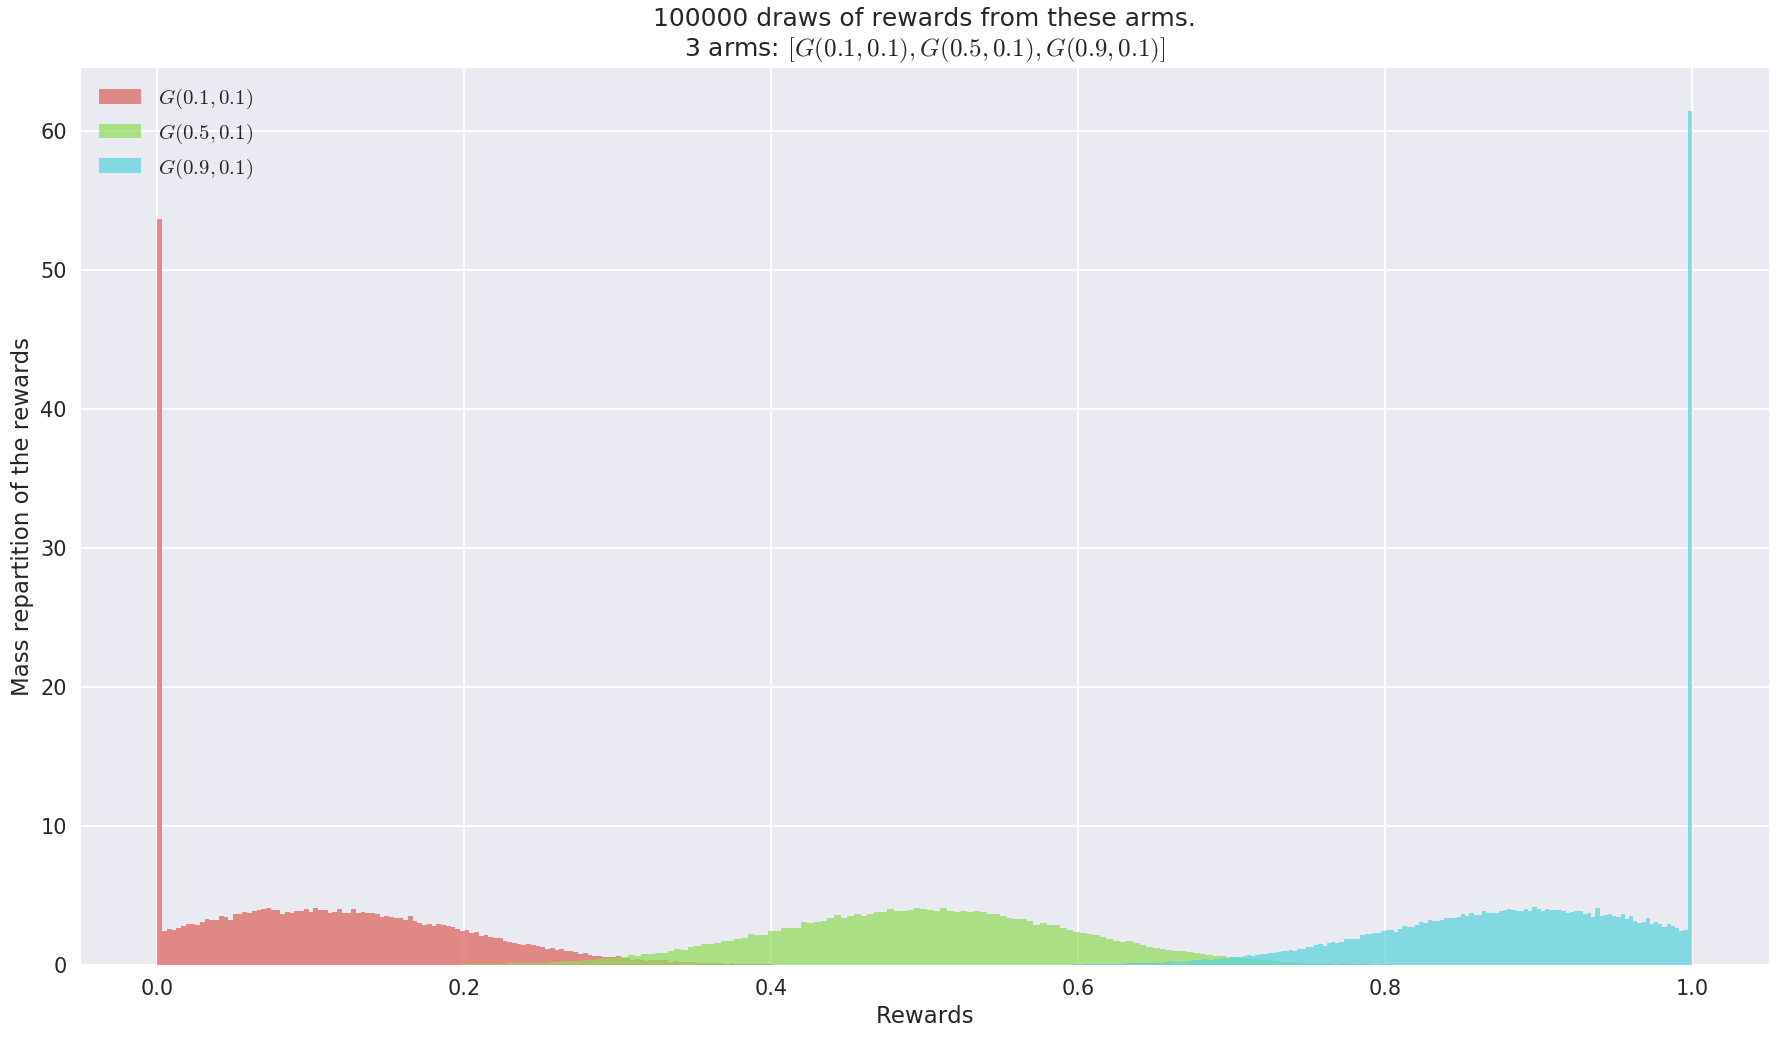

In [11]:
M_G = MAB([Gaussian(mu, sigma=0.10) for mu in [0.1, 0.5, 0.9]])
M_G.plotHistogram(100000)

We see that due to the truncation, if mean of the Gaussian is too close to $0$ or $1$, then actual mean rewards is pushed to $0$ or $1$ (here the blue arm clearly has a mean higher than $0.9$).

And for larger variances, it is even stronger:

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [G(0.1, 0.25), G(0.5, 0.25), G(0.9, 0.25)] ...
 - with 'arms' = [G(0.1, 0.25), G(0.5, 0.25), G(0.9, 0.25)]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.87 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...


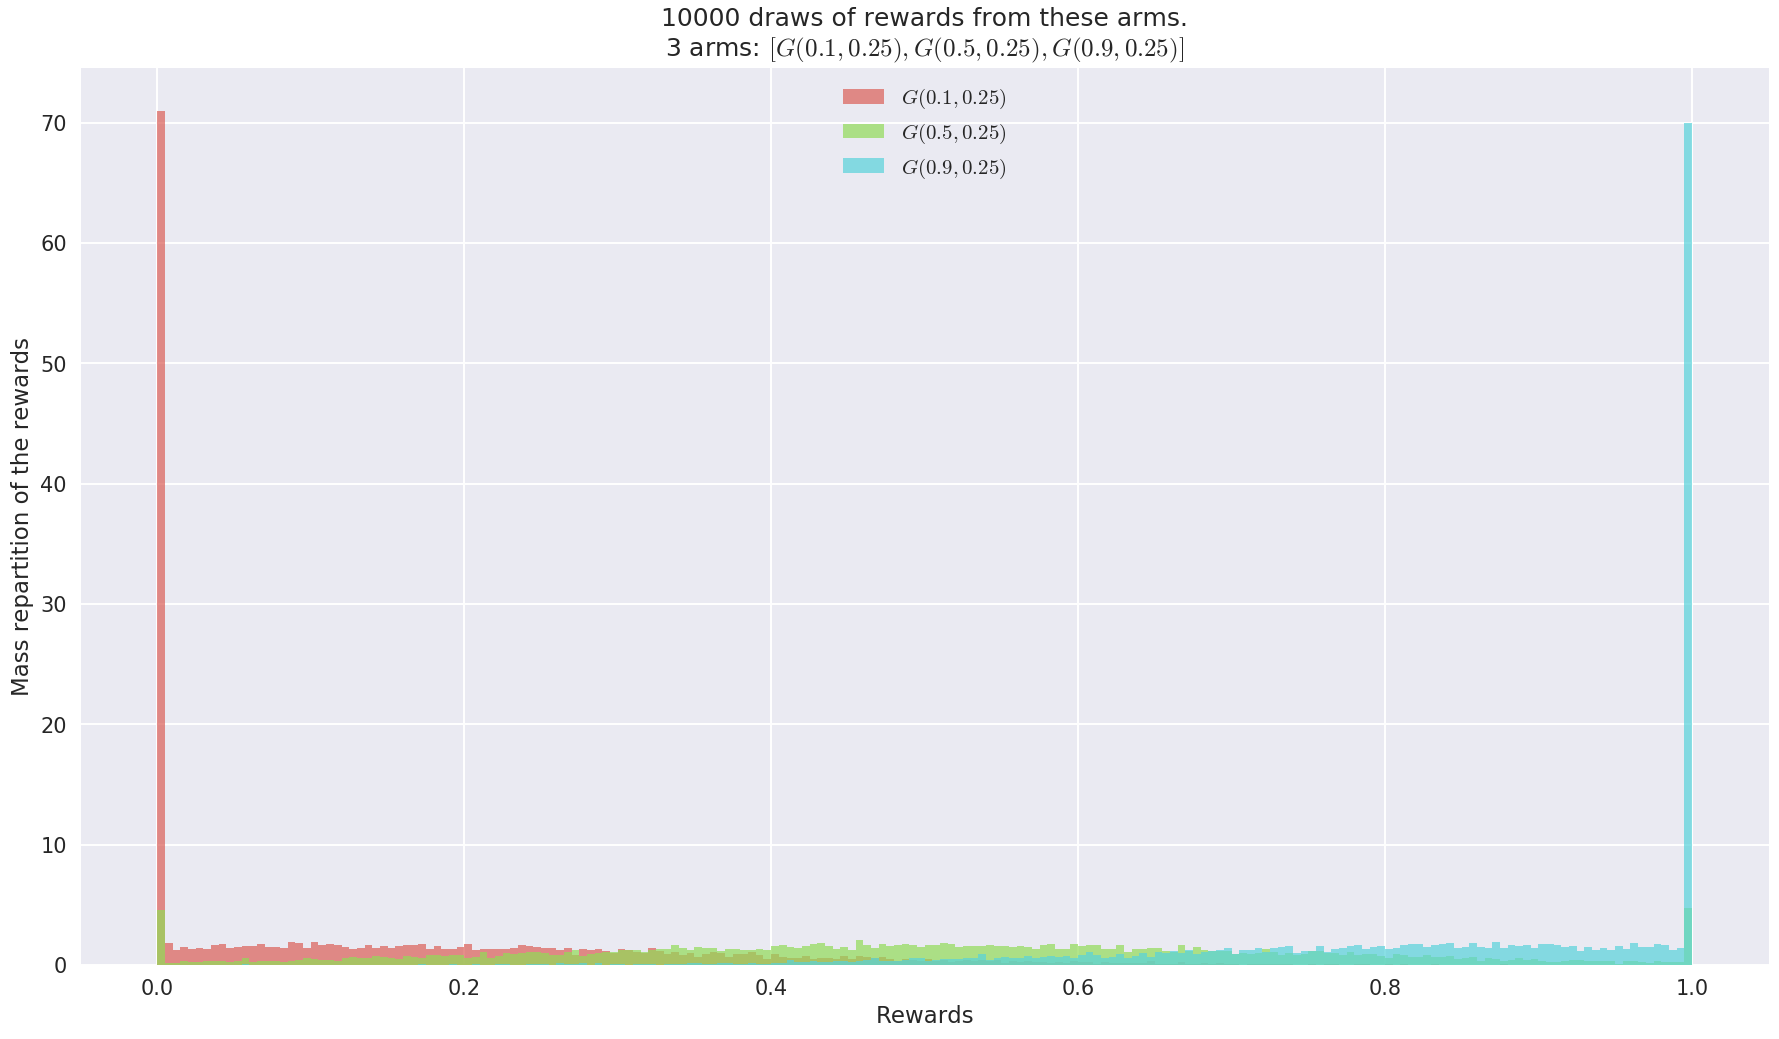

In [12]:
M_G = MAB([Gaussian(mu, sigma=0.25) for mu in [0.1, 0.5, 0.9]])
M_G.plotHistogram()

## Exponential arms
We can do the same with (truncated) Exponential arms, and as a convenience I prefer to work with `ExponentialFromMean`, to use the mean and not the $\lambda$ parameter to create the arm.

In [13]:
M_E = MAB({ "arm_type": ExponentialFromMean, "params": [0.1, 0.5, 0.9]})

Creating a new MAB problem ...
  Reading arms of this MAB problem from a dictionnary 'configuration' = {'arm_type': <class 'Arms.Exponential.ExponentialFromMean'>, 'params': [0.1, 0.5, 0.9]} ...
 - with 'arm_type' = <class 'Arms.Exponential.ExponentialFromMean'>
 - with 'params' = [0.1, 0.5, 0.9]
 - with 'arms' = [Exp(10, 1), Exp(1.59, 1), Exp(0.215, 1)]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.900000003233
 - with 'minArm' = 0.100000000055

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.4 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...


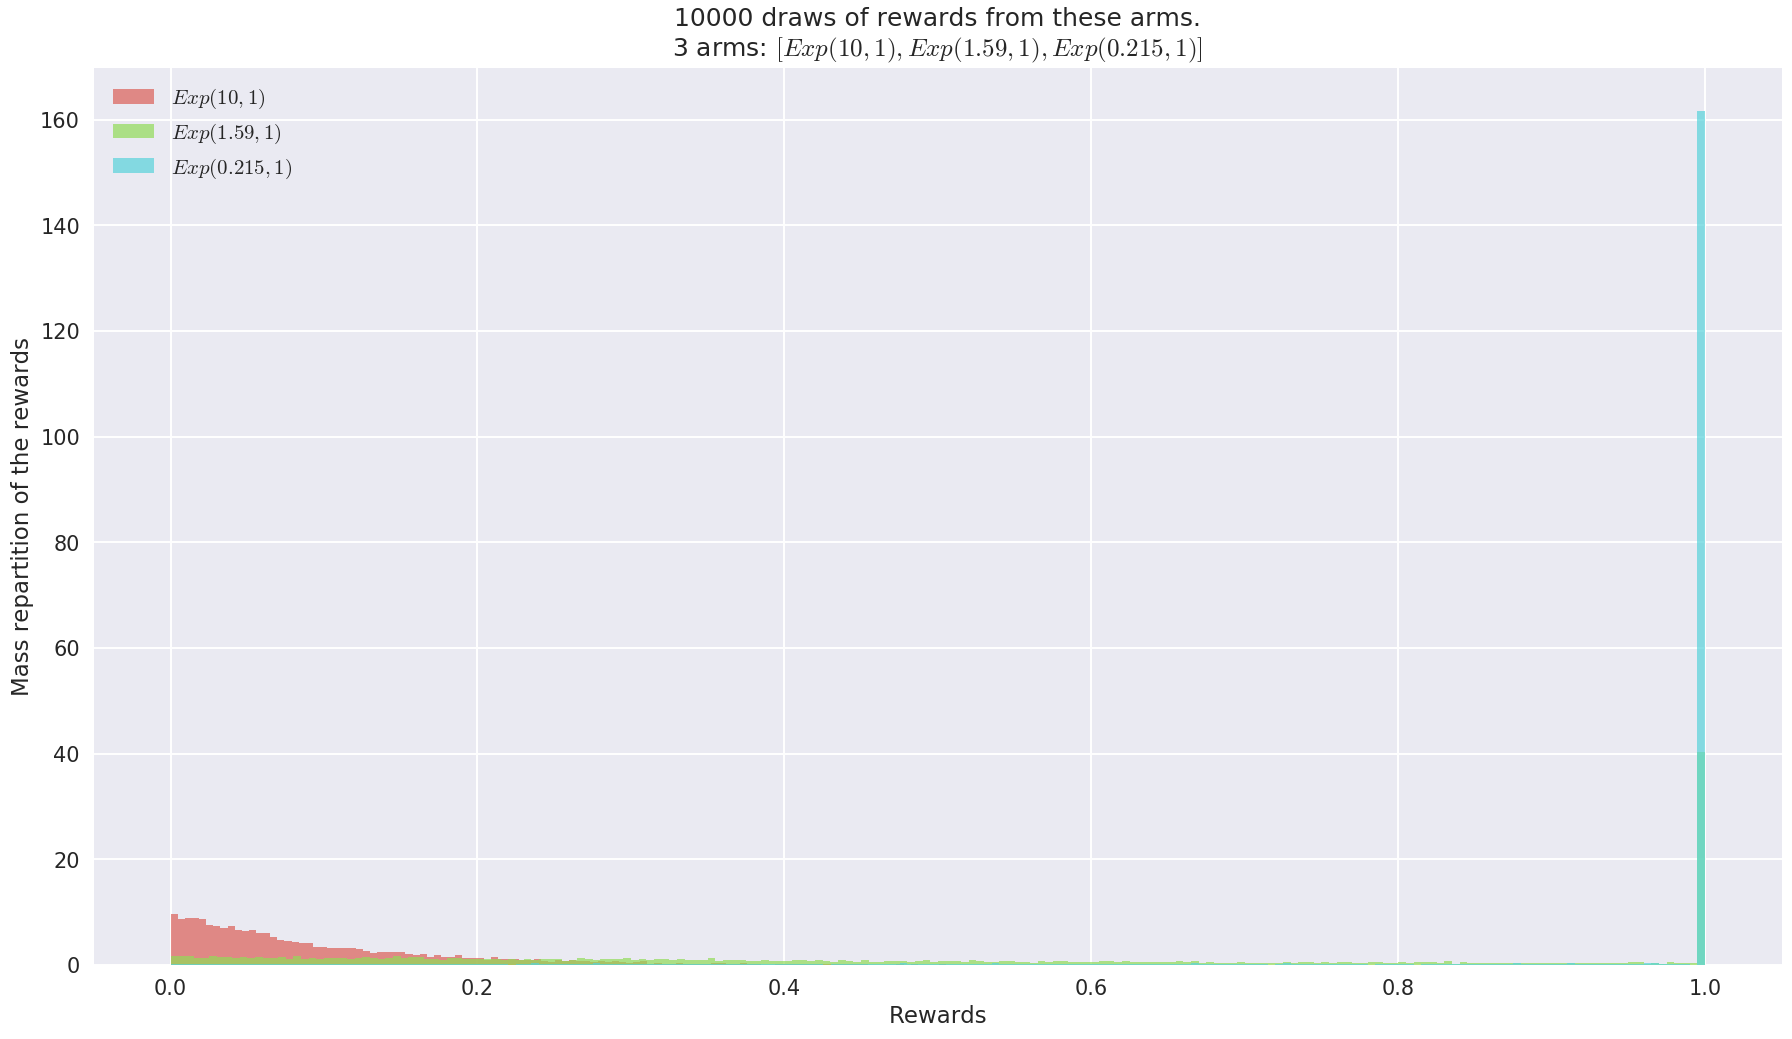

In [14]:
M_E.plotHistogram()

## Uniform arms
Arms with rewards uniform in $[0,1]$, are continuous versions of Bernoulli$(0.5)$.
They can also be uniform in other intervals.

In [15]:
Uniform(0, 1).lower_amplitude
Uniform(0, 0.1).lower_amplitude
Uniform(0.4, 0.5).lower_amplitude
Uniform(0.8, 0.9).lower_amplitude

(0, 1)

(0, 0.1)

(0.4, 0.09999999999999998)

(0.8, 0.09999999999999998)

In [16]:
M_U = MAB([Uniform(0, 1), Uniform(0, 0.1), Uniform(0.4, 0.5), Uniform(0.8, 0.9)])

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [U(0, 1), U(0, 0.1), U(0.4, 0.1), U(0.8, 0.1)] ...
 - with 'arms' = [U(0, 1), U(0, 0.1), U(0.4, 0.1), U(0.8, 0.1)]
 - with 'nbArms' = 4
 - with 'maxArm' = 0.85
 - with 'minArm' = 0.05

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 2.47 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 36.25% ...


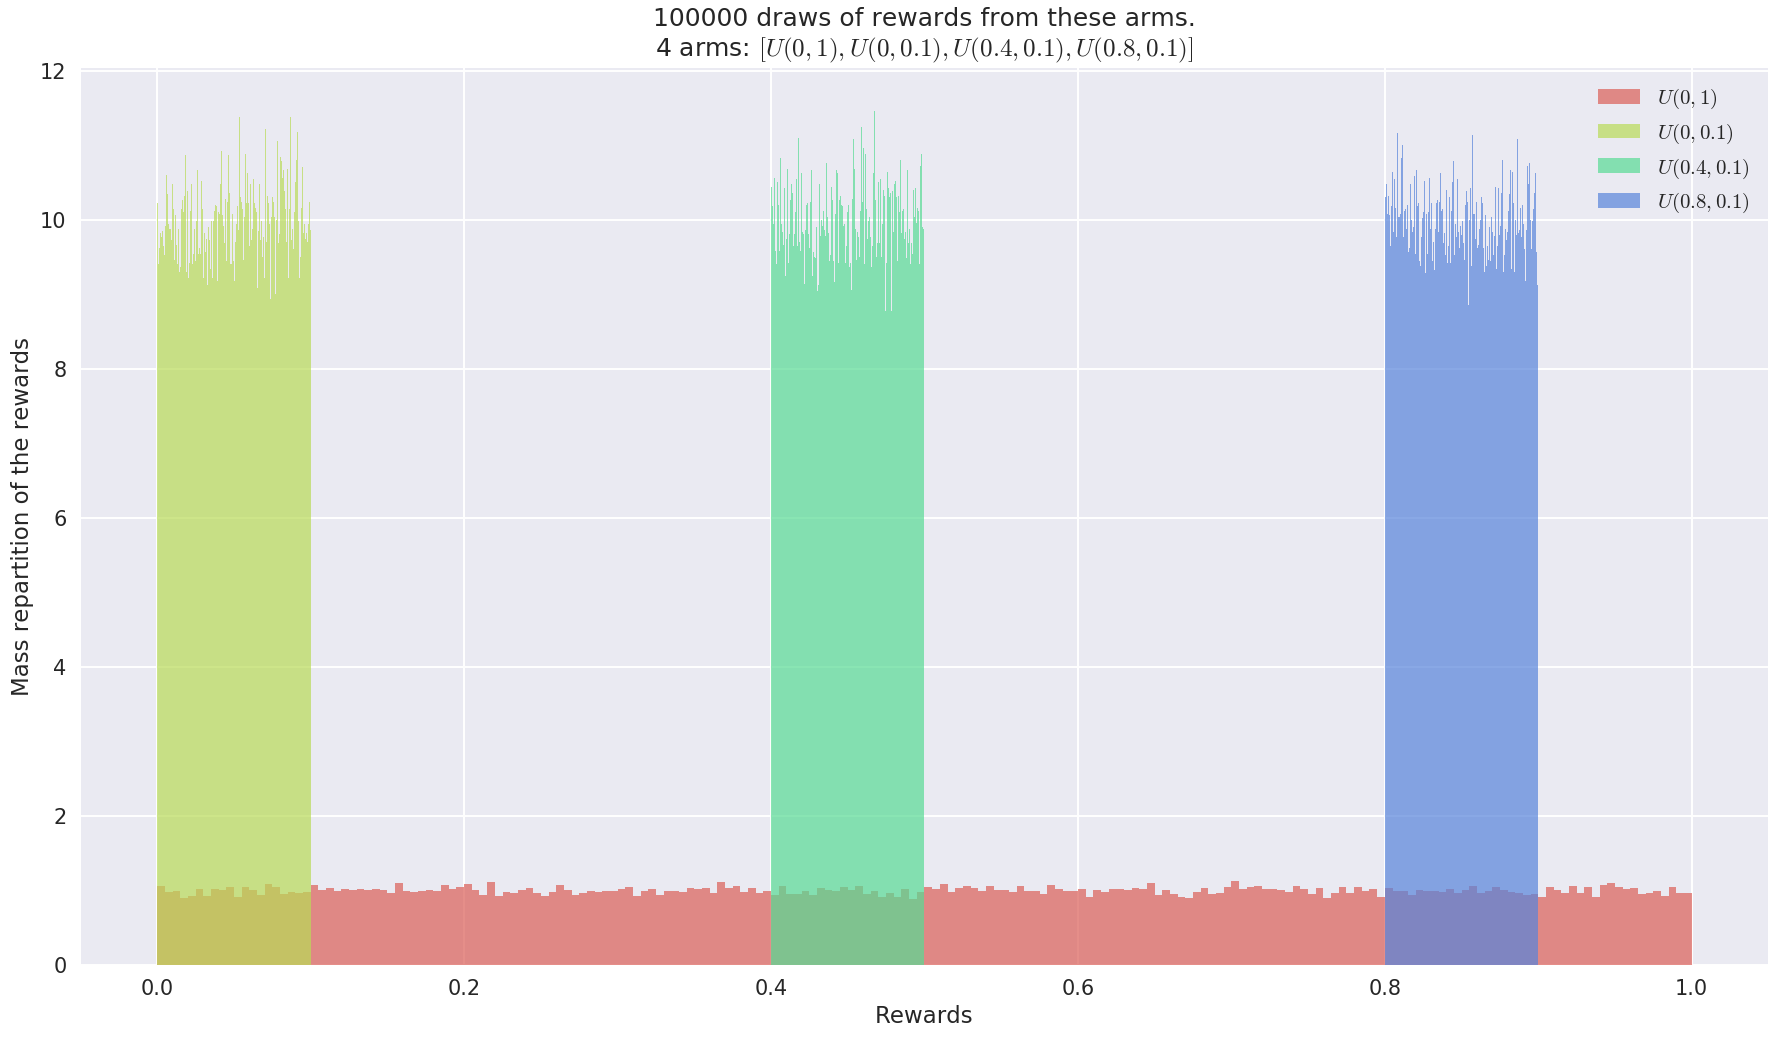

In [17]:
M_U.plotHistogram(100000)

----
## Arms with rewards outside of $[0, 1]$

Of course, everything work similarly if rewards are not in $[0, 1]$ but in any interval $[a, b]$.

Note that all my algorithms assume $a = \text{lower} = 0$ and $b = 1$ (and use 
$\text{amplitude} = b - a$ instead of $b$).
They just need to be specified if we stop using the default choice $[0, 1]$.

For example, Gaussian arms can be truncated into $[-10, 10]$ instead of $[0, 1]$.
Let define some Gaussian arms, with means $-5, 0, 5$ and a variance of $\sigma^2 = 2$.

In [18]:
M_G = MAB([Gaussian(mu, sigma=2, mini=-10, maxi=10) for mu in [-5, 0, 5]])

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [G(-5, 2), G(0, 2), G(5, 2)] ...
 - with 'arms' = [G(-5, 2), G(0, 2), G(5, 2)]
 - with 'nbArms' = 3
 - with 'maxArm' = 5
 - with 'minArm' = -5

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.2 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 16.67% ...


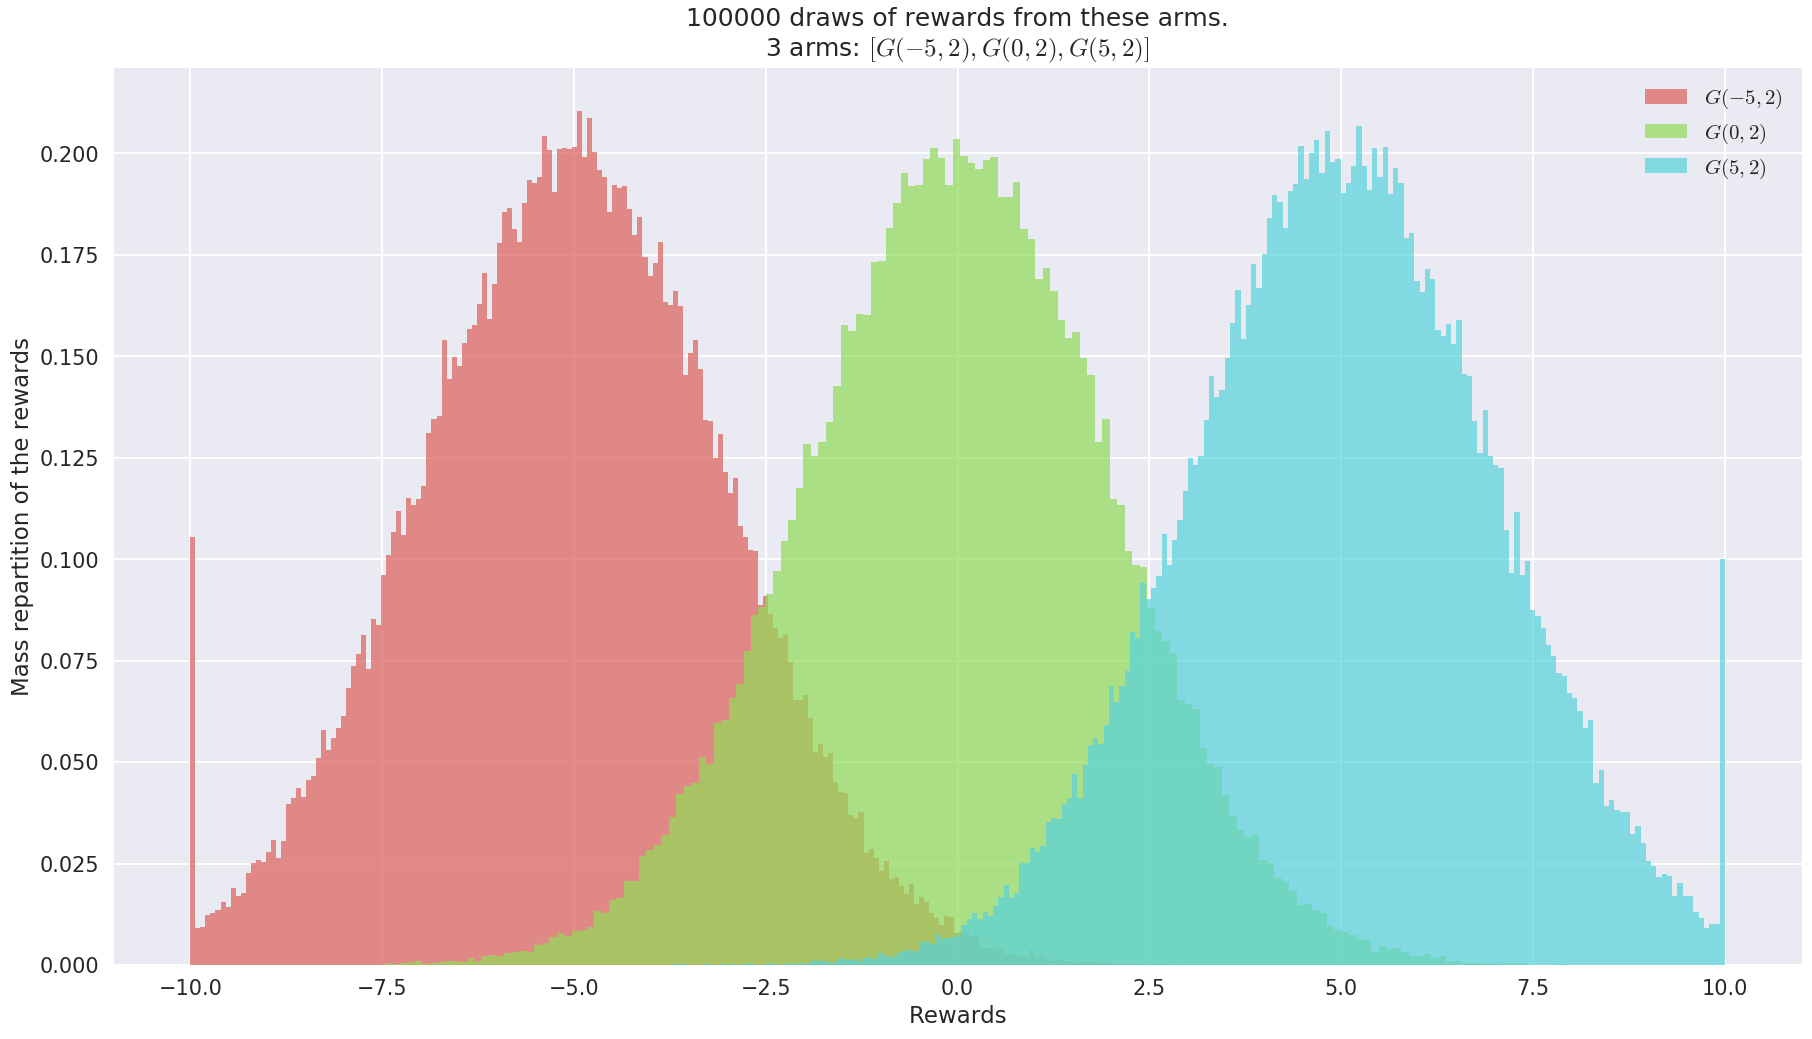

In [19]:
M_G.plotHistogram(100000)

In [20]:
M_G = MAB([Gaussian(mu, sigma=0.1, mini=-10, maxi=10) for mu in [-5, 0, 5]])

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [G(-5, 0.1), G(0, 0.1), G(5, 0.1)] ...
 - with 'arms' = [G(-5, 0.1), G(0, 0.1), G(5, 0.1)]
 - with 'nbArms' = 3
 - with 'maxArm' = 5
 - with 'minArm' = -5

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 0.06 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 16.67% ...


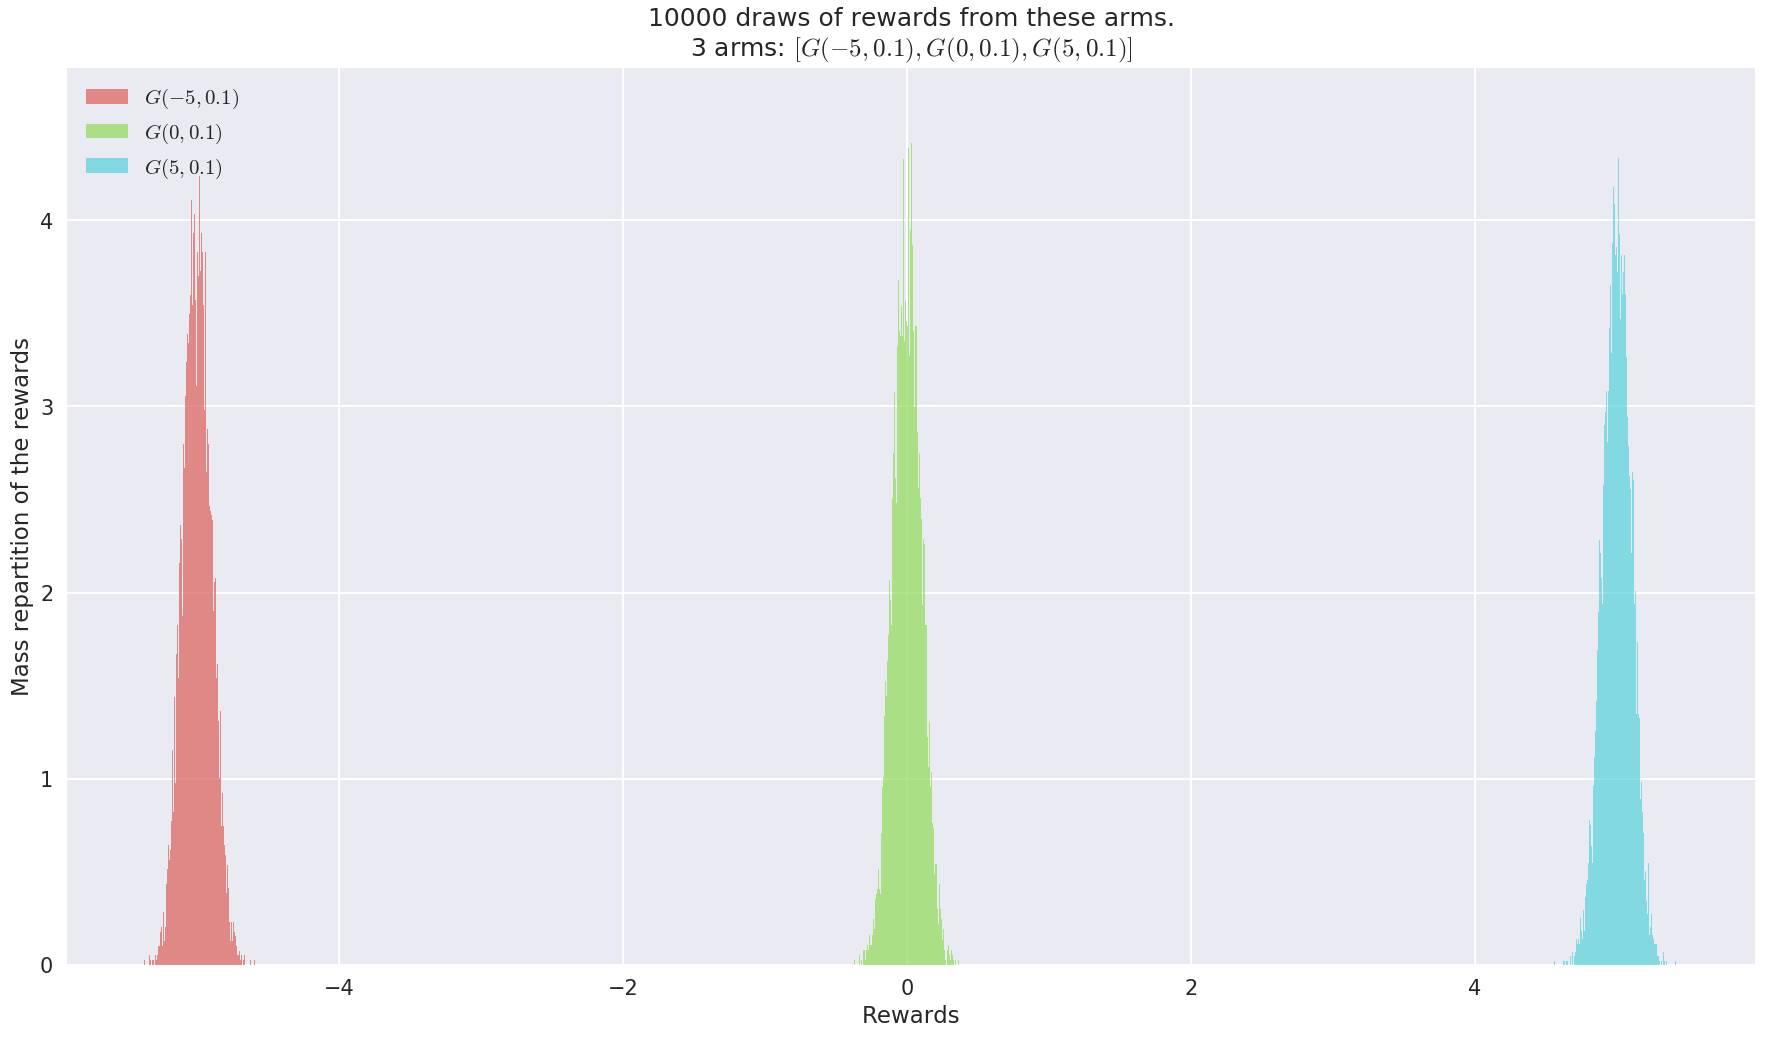

In [21]:
M_G.plotHistogram()

## Gamma arms

We can do the same with (truncated) Gamma arms, and as a convenience I prefer to work with `GammaFromMean`, to use the mean and not the $k$ shape parameter to create the arm.
The scale $\theta$ is fixed to $1$ by default, and here the rewards will be in $[0, 10]$.

In [31]:
M_Gamma = MAB([GammaFromMean(shape, scale=1, mini=0, maxi=10) for shape in [1, 2, 3, 4, 5]])

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [\Gamma(1, 1), \Gamma(2, 1), \Gamma(3, 1), \Gamma(4, 1), \Gamma(5, 1)] ...
 - with 'arms' = [\Gamma(1, 1), \Gamma(2, 1), \Gamma(3, 1), \Gamma(4, 1), \Gamma(5, 1)]
 - with 'nbArms' = 5
 - with 'maxArm' = 5.0
 - with 'minArm' = 1.0

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 75.7 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...


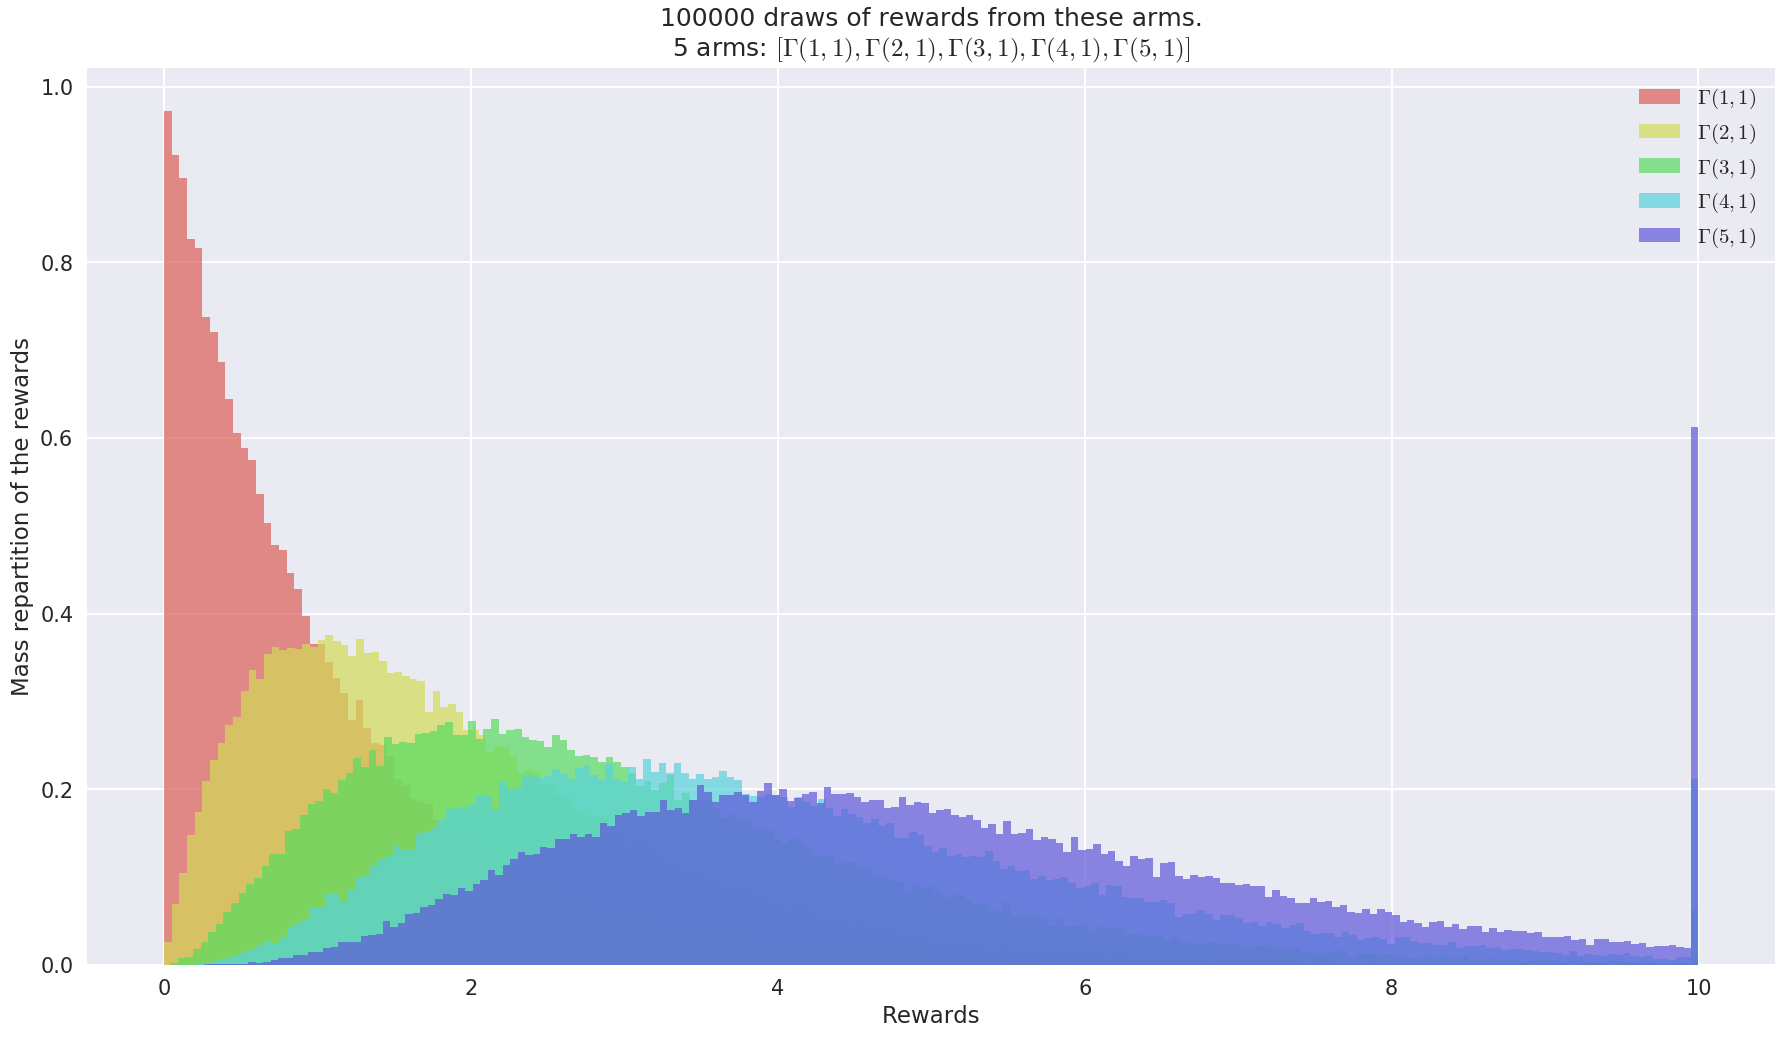

In [32]:
M_Gamma.plotHistogram(100000)

As for Gaussian arms, the truncation is strongly changing the means of the arm rewards.
Here the arm with mean parameter $5$ has an empirical mean close  to $10$ due to truncation.

## Non-truncated Gaussian and Gamma arms

Let try with non-truncated rewards.

In [28]:
M_G = MAB([Gaussian(mu, sigma=3, mini=float('-inf'), maxi=float('+inf')) for mu in [-10, 0, 10]])

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [G(-10, 3), G(0, 3), G(10, 3)] ...
 - with 'arms' = [G(-10, 3), G(0, 3), G(10, 3)]
 - with 'nbArms' = 3
 - with 'maxArm' = 10
 - with 'minArm' = -10

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 0.9 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 66.67% ...


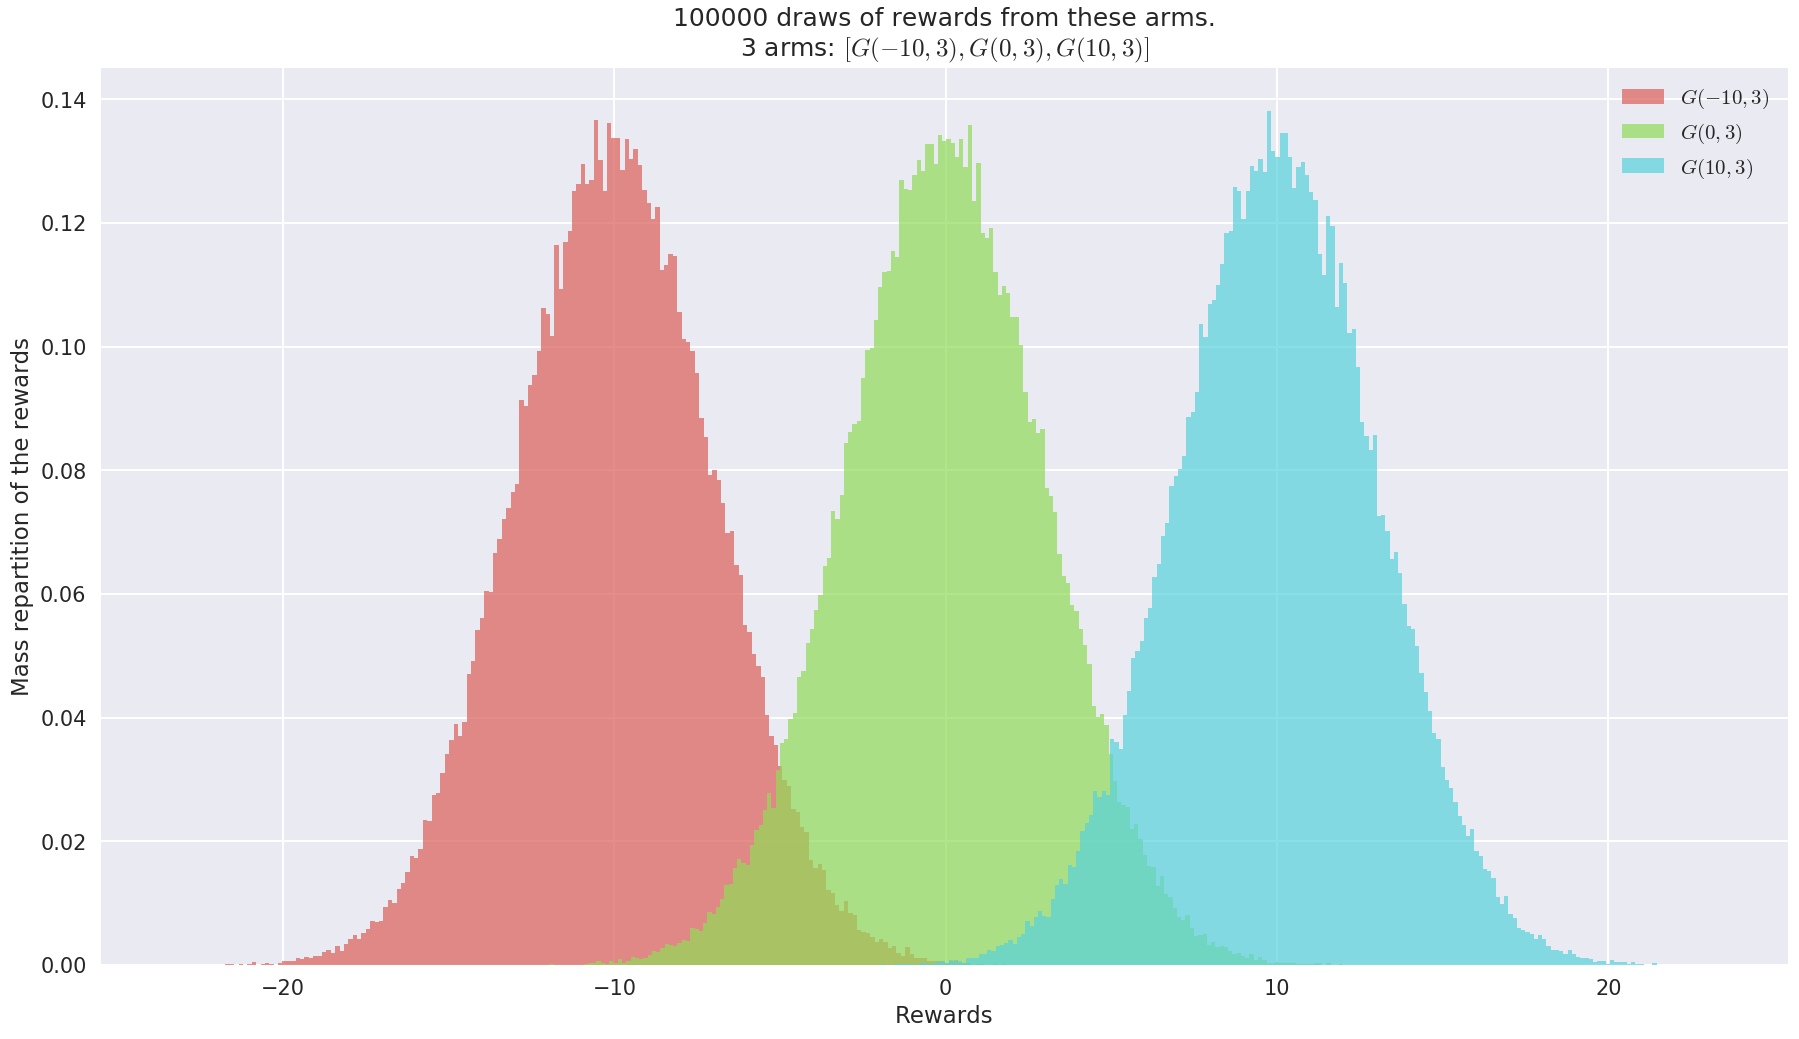

In [29]:
M_G.plotHistogram(100000)

And with non-truncated Gamma arms ?

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [\Gamma(1, 1), \Gamma(2, 1), \Gamma(3, 1), \Gamma(4, 1), \Gamma(5, 1)] ...
 - with 'arms' = [\Gamma(1, 1), \Gamma(2, 1), \Gamma(3, 1), \Gamma(4, 1), \Gamma(5, 1)]
 - with 'nbArms' = 5
 - with 'maxArm' = 5.0
 - with 'minArm' = 1.0

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 75.7 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 80.00% ...


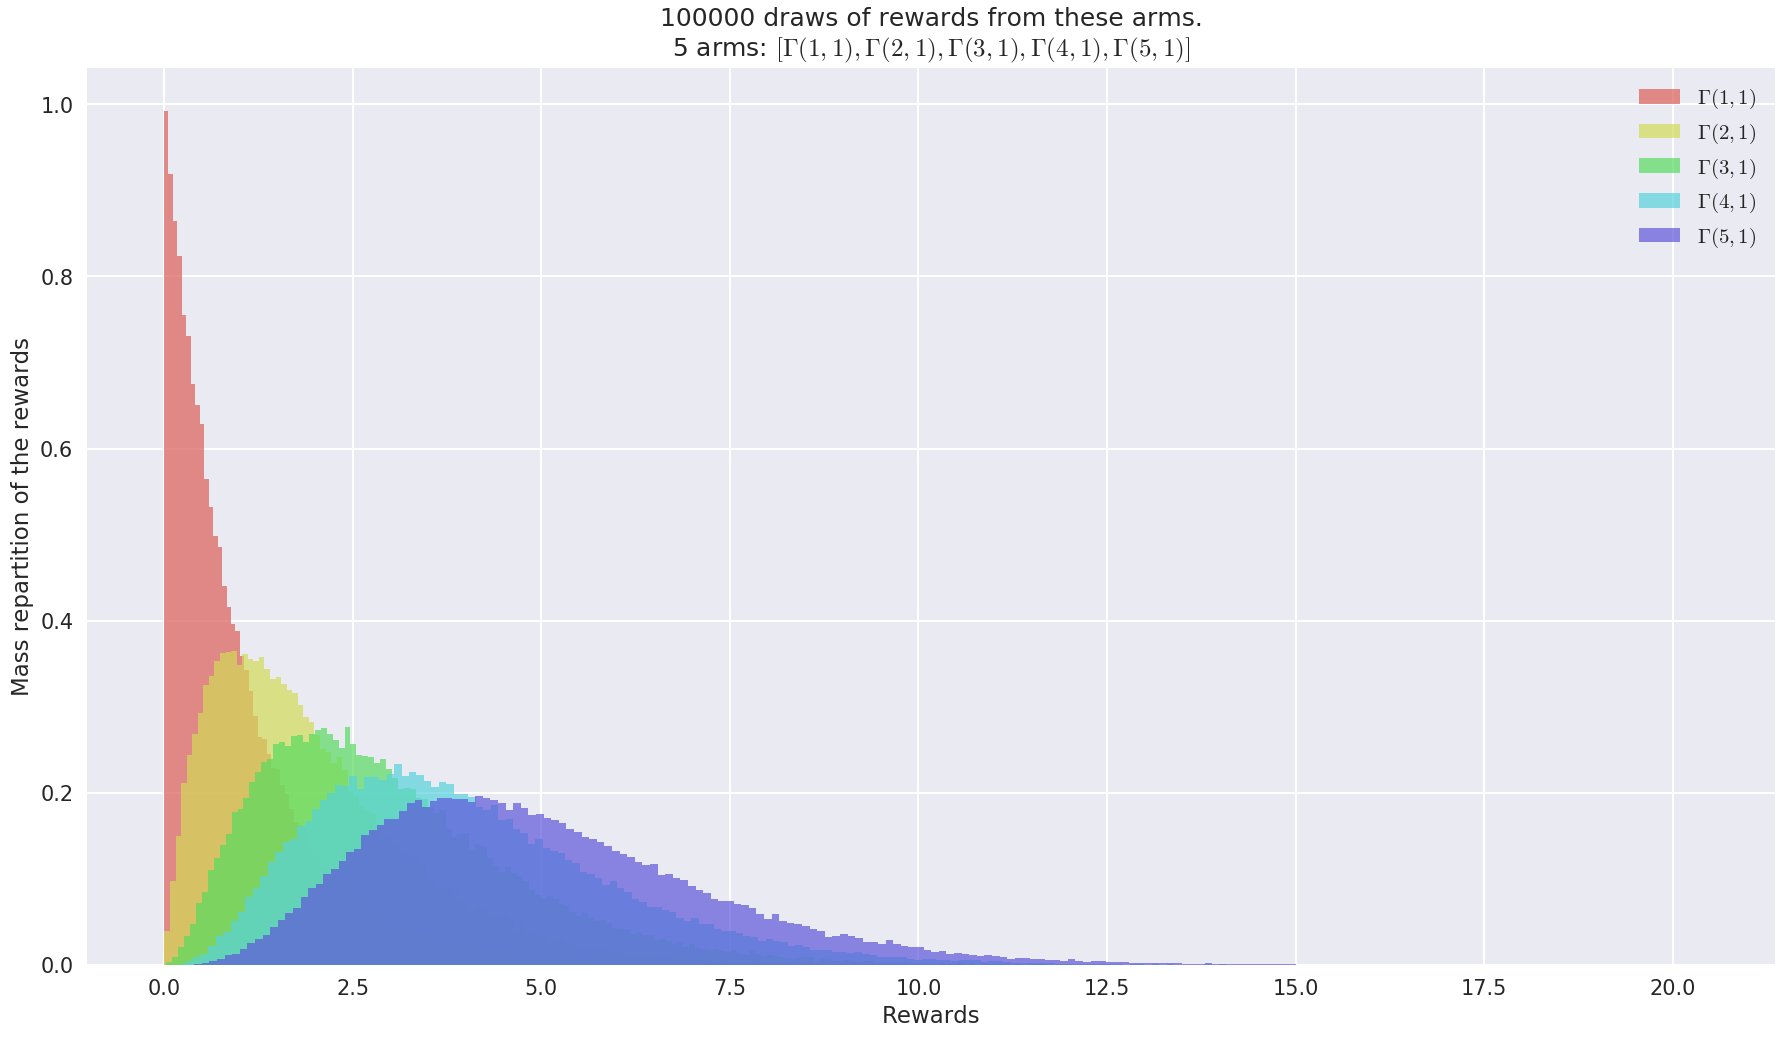

In [36]:
M_Gamma = MAB([GammaFromMean(shape, scale=1, mini=float('-inf'), maxi=float('+inf')) for shape in [1, 2, 3, 4, 5]])
M_Gamma.plotHistogram(100000)

Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [\Gamma(10, 1), \Gamma(20, 1), \Gamma(30, 1), \Gamma(40, 1), \Gamma(50, 1)] ...
 - with 'arms' = [\Gamma(10, 1), \Gamma(20, 1), \Gamma(30, 1), \Gamma(40, 1), \Gamma(50, 1)]
 - with 'nbArms' = 5
 - with 'maxArm' = 50.0
 - with 'minArm' = 10.0

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 757 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 80.00% ...


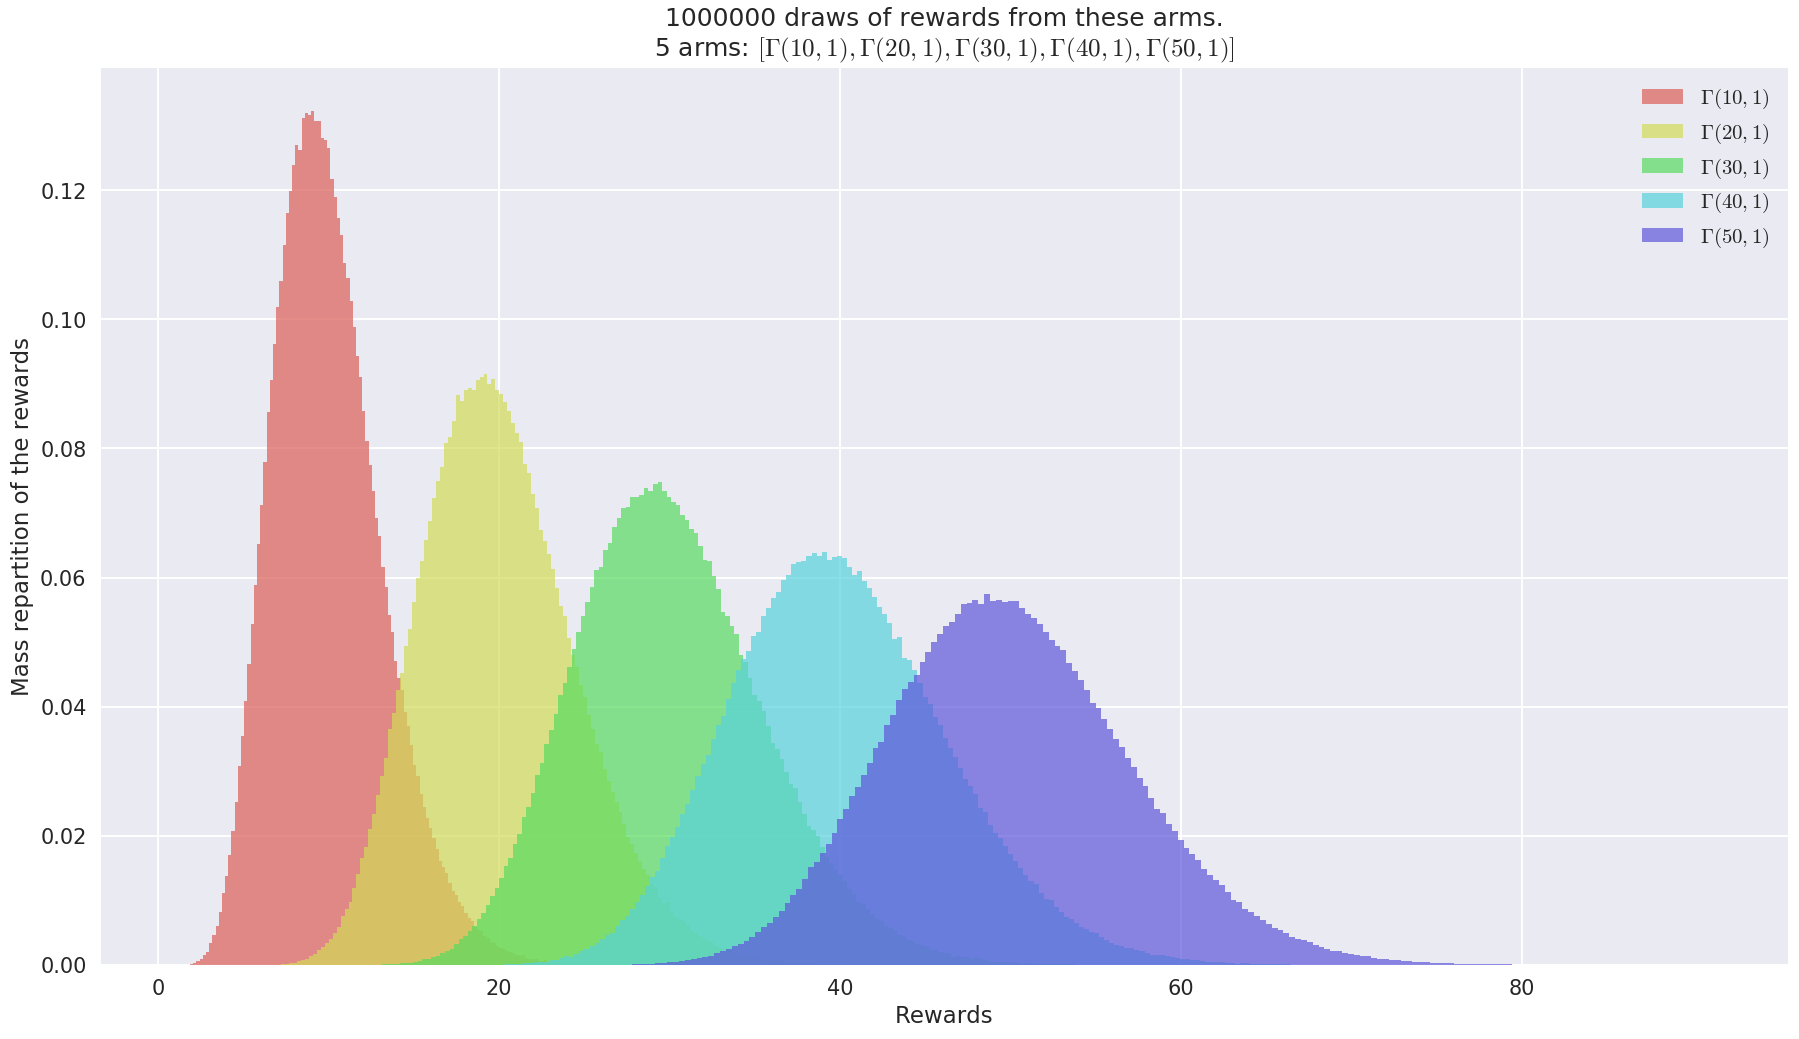

In [38]:
M_Gamma = MAB([GammaFromMean(shape, scale=1, mini=float('-inf'), maxi=float('+inf')) for shape in [10, 20, 30, 40, 50]])
M_Gamma.plotHistogram(1000000)

----
## Conclusion

This small notebook demonstrated how to define arms and Multi-Armed Bandit problems in my framework.